<a href="https://colab.research.google.com/github/nhammond36/AIML/blob/master/2_Explore_Latest_Illinois_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2. **EXPLORING THE COVID-19 DATA - ILLINOIS**

---




## COVID-19 DATA
* The Research Computing Center (RCC) at The University of Chicago hosts COVID-19 datasets, so our users can have them in a centralized place, at https://projects.rcc.uchicago.edu/rcc/covid19-data/

* The following are COVID-19 HPC datasets the RCC hosts on Midway:


> 1.  [2019 Novel Coronavirus COVID-19 (2019-nCoV) Data Repository by Johns Hopkins CSSE](https://projects.rcc.uchicago.edu/rcc/covid19-data/COVID-19/)
> 2.  [Data assembled by the NYC Department of Health and Mental Hygiene (DOHMH)](https://projects.rcc.uchicago.edu/rcc/covid19-data/coronavirus-data/)
> 3. [The New York Times series of data files with cumulative counts of coronavirus cases in the United States](https://projects.rcc.uchicago.edu/rcc/covid19-data/covid-19-data/)
> 4. [RCC curates and maintains source data that is used to create the COVID-19 ZIP Map organized by the Illinois Department of Public Health](https://projects.rcc.uchicago.edu/rcc/covid19-data/covid-19-illinois-data/)

## Explore Illinoi's Recent Data

* We will be using the Illinois COVID-19 data available at: https://projects.rcc.uchicago.edu/rcc/covid19-data/covid-19-illinois-data/ and https://github.com/rcc-uchicago/covid-19-illinois-data

In [0]:
# import pandas and matplotlib libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Total number of confirmed cases by ZIP code

In [0]:
# create the data frame
df = pd.read_csv("https://projects.rcc.uchicago.edu/rcc/covid19-data/covid-19-illinois-data/confirmed_cases_by_zip.csv")

In [0]:
# display first 10 rows of the confirmed cases arranged by zip
df.head(10)

,zip,confirmed_cases
0,60002,28
1,60004,54
2,60005,33
3,60007,48
4,60008,31
5,60010,27
6,60012,16
7,60013,31
8,60014,31
9,60015,67


### Total number of confirmed cases organized by age group

In [0]:
# read the latest COVID-19 confirmed cases and deaths data organized by age
by_age = pd.read_csv("https://projects.rcc.uchicago.edu/rcc/covid19-data/covid-19-illinois-data/characteristics_by_age.csv")
by_age.head(10)

,last_update,age_group,count,deaths
0,2020-4-16,Unknown,7,0
1,2020-4-16,<20,544,2
2,2020-4-16,20-29,3116,3
3,2020-4-16,30-39,3970,19
4,2020-4-16,40-49,4733,44
5,2020-4-16,50-59,5138,101
6,2020-4-16,60-69,3893,198
7,2020-4-16,70-79,2397,293
8,2020-4-16,80+,1935,412


In [0]:
# set the index to be age_group
by_age.set_index('age_group', drop=True, inplace=True)
by_age.head(10)

,last_update,count,deaths
age_group,,,
Unknown,2020-4-16,7,0
<20,2020-4-16,544,2
20-29,2020-4-16,3116,3
30-39,2020-4-16,3970,19
40-49,2020-4-16,4733,44
50-59,2020-4-16,5138,101
60-69,2020-4-16,3893,198
70-79,2020-4-16,2397,293
80+,2020-4-16,1935,412


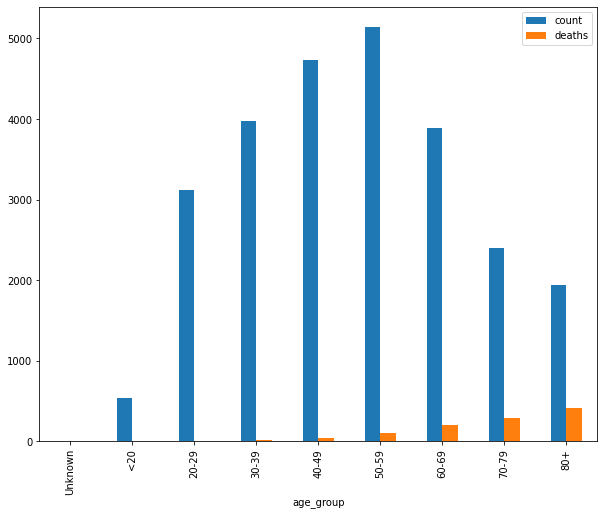

In [0]:
# plot the number of confirmed cases and the deaths by age
ax = by_age.plot(kind='bar', figsize=(10, 8))

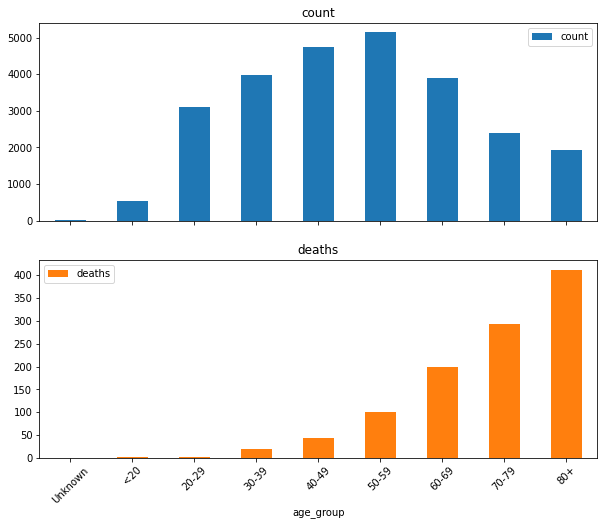

In [0]:
# plot the number of confirmed cases and the number of deaths independently, to show the increase of number of deaths with the age
age_axes = by_age.plot.bar(rot=45, subplots=True, figsize=(10, 8))

Text(0, 0.5, 'mortality rate')

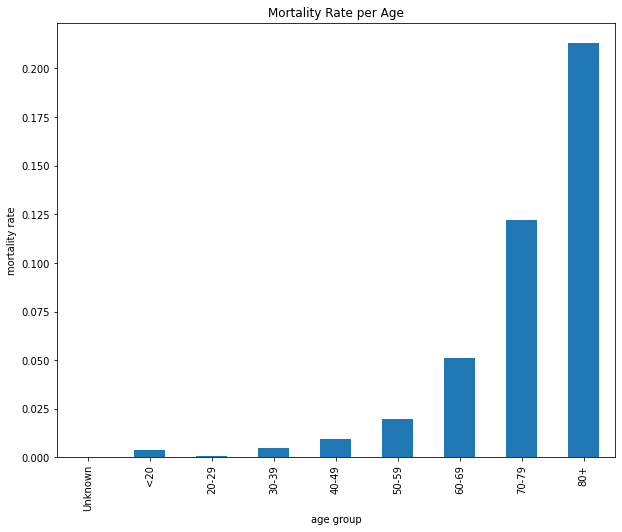

In [0]:
# plot the mortality rate by age
plt.figure(figsize=(10, 8))
mortality_by_age = by_age['deaths'] / by_age['count']
mortality_by_age.plot(kind='bar', title='Mortality Rate per Age')
plt.xlabel('age group')
plt.ylabel('mortality rate')

### Total number of confirmed cases organized by gender

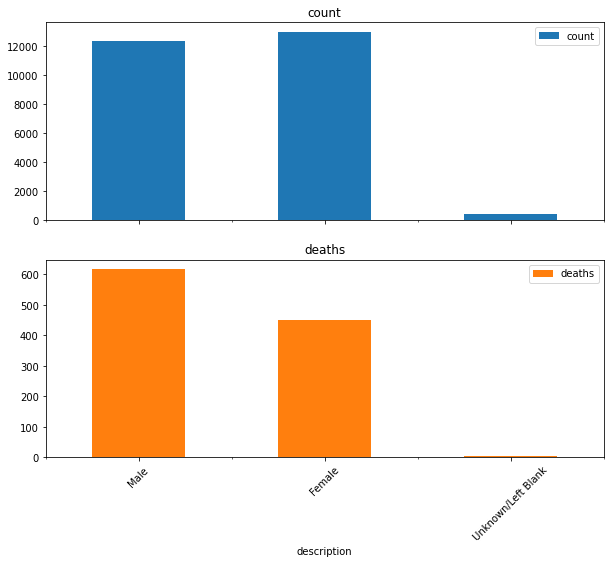

In [0]:
# plot the number of confirmed cases and the number of deaths independently, to show the increase of number of deaths with the gender
by_gender = pd.read_csv("https://projects.rcc.uchicago.edu/rcc/covid19-data/covid-19-illinois-data/characteristics_by_gender.csv")
by_gender.set_index('description', drop=True, inplace=True)
by_gender.plot.bar(rot=45, subplots=True, figsize=(10, 8));

### Total number of confirmed cases organized by race

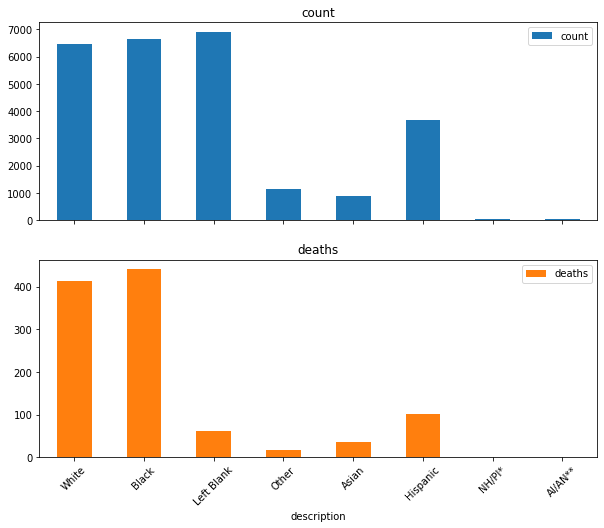

In [0]:
# plot the number of confirmed cases and the deaths by race
by_race = pd.read_csv("https://projects.rcc.uchicago.edu/rcc/covid19-data/covid-19-illinois-data/characteristics_by_race.csv")
by_race.set_index('description', drop=True, inplace=True)
by_race.plot.bar(rot=45, subplots=True, figsize=(10, 8));

### Mortality Rates

[Text(0.5, 0, 'race')]

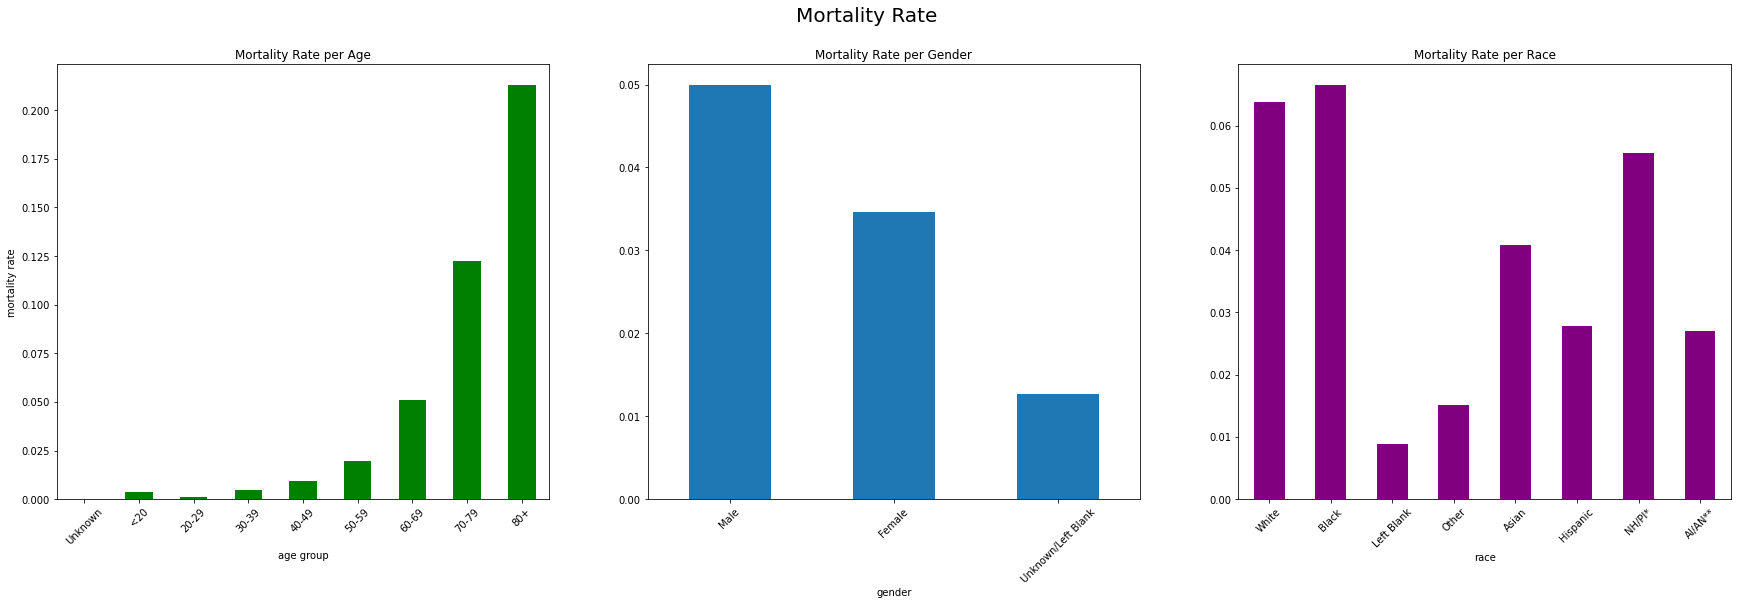

In [0]:
mortality_by_age = by_age['deaths'] / by_age['count']
mortality_by_gender = by_gender['deaths'] / by_gender['count']
mortality_by_race = by_race['deaths'] / by_race['count']

# plot the mortality rate by age, gender, and race
fig, axes = plt.subplots(1,3, figsize=(30, 8))
fig.suptitle('Mortality Rate', fontsize=20)

mortality_by_age.plot(kind='bar', title='Mortality Rate per Age', ax=axes[0], color='green', rot=45)
axes[0].set(xlabel='age group')
axes[0].set(ylabel='mortality rate')

mortality_by_gender.plot(kind='bar', title='Mortality Rate per Gender', ax=axes[1], rot=45)
axes[1].set(xlabel='gender')

mortality_by_race.plot(kind='bar', title='Mortality Rate per Race', ax=axes[2], color='purple', rot=45)
axes[2].set(xlabel='race')


### Data organized by county

In [0]:
# plot the number of tested, confirmed cases, deaths, and negative by County, today
by_county = pd.read_csv("https://projects.rcc.uchicago.edu/rcc/covid19-data/covid-19-illinois-data/historical_state_testing_results_by_county.csv")
by_county.set_index('County', drop=True, inplace=True)

today = "4/13/2020"
today_by_county=by_county[by_county.testDate == today]
today_by_county.head(10)


,testDate,total_tested,confirmed_cases,deaths,negative,lat,lon
County,,,,,,,
Illinois,4/13/2020,105768,22025,794,0,39.839888,-89.510168
Chicago,4/13/2020,0,9084,308,0,41.789896,-87.627734
Adams,4/13/2020,0,26,0,0,40.057800,-91.135300
Alexander,4/13/2020,0,0,0,0,37.167000,-89.360600
Bond,4/13/2020,0,4,0,0,38.903000,-89.474200
Boone,4/13/2020,0,13,1,0,42.348500,-88.826300
Brown,4/13/2020,0,0,0,0,0.000000,0.000000
Bureau,4/13/2020,0,6,0,0,0.000000,0.000000
Calhoun,4/13/2020,0,1,0,0,0.000000,0.000000


In [0]:
#If you have not Seaborn library installed, install it by commenting next line
#!pip install seaborn
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


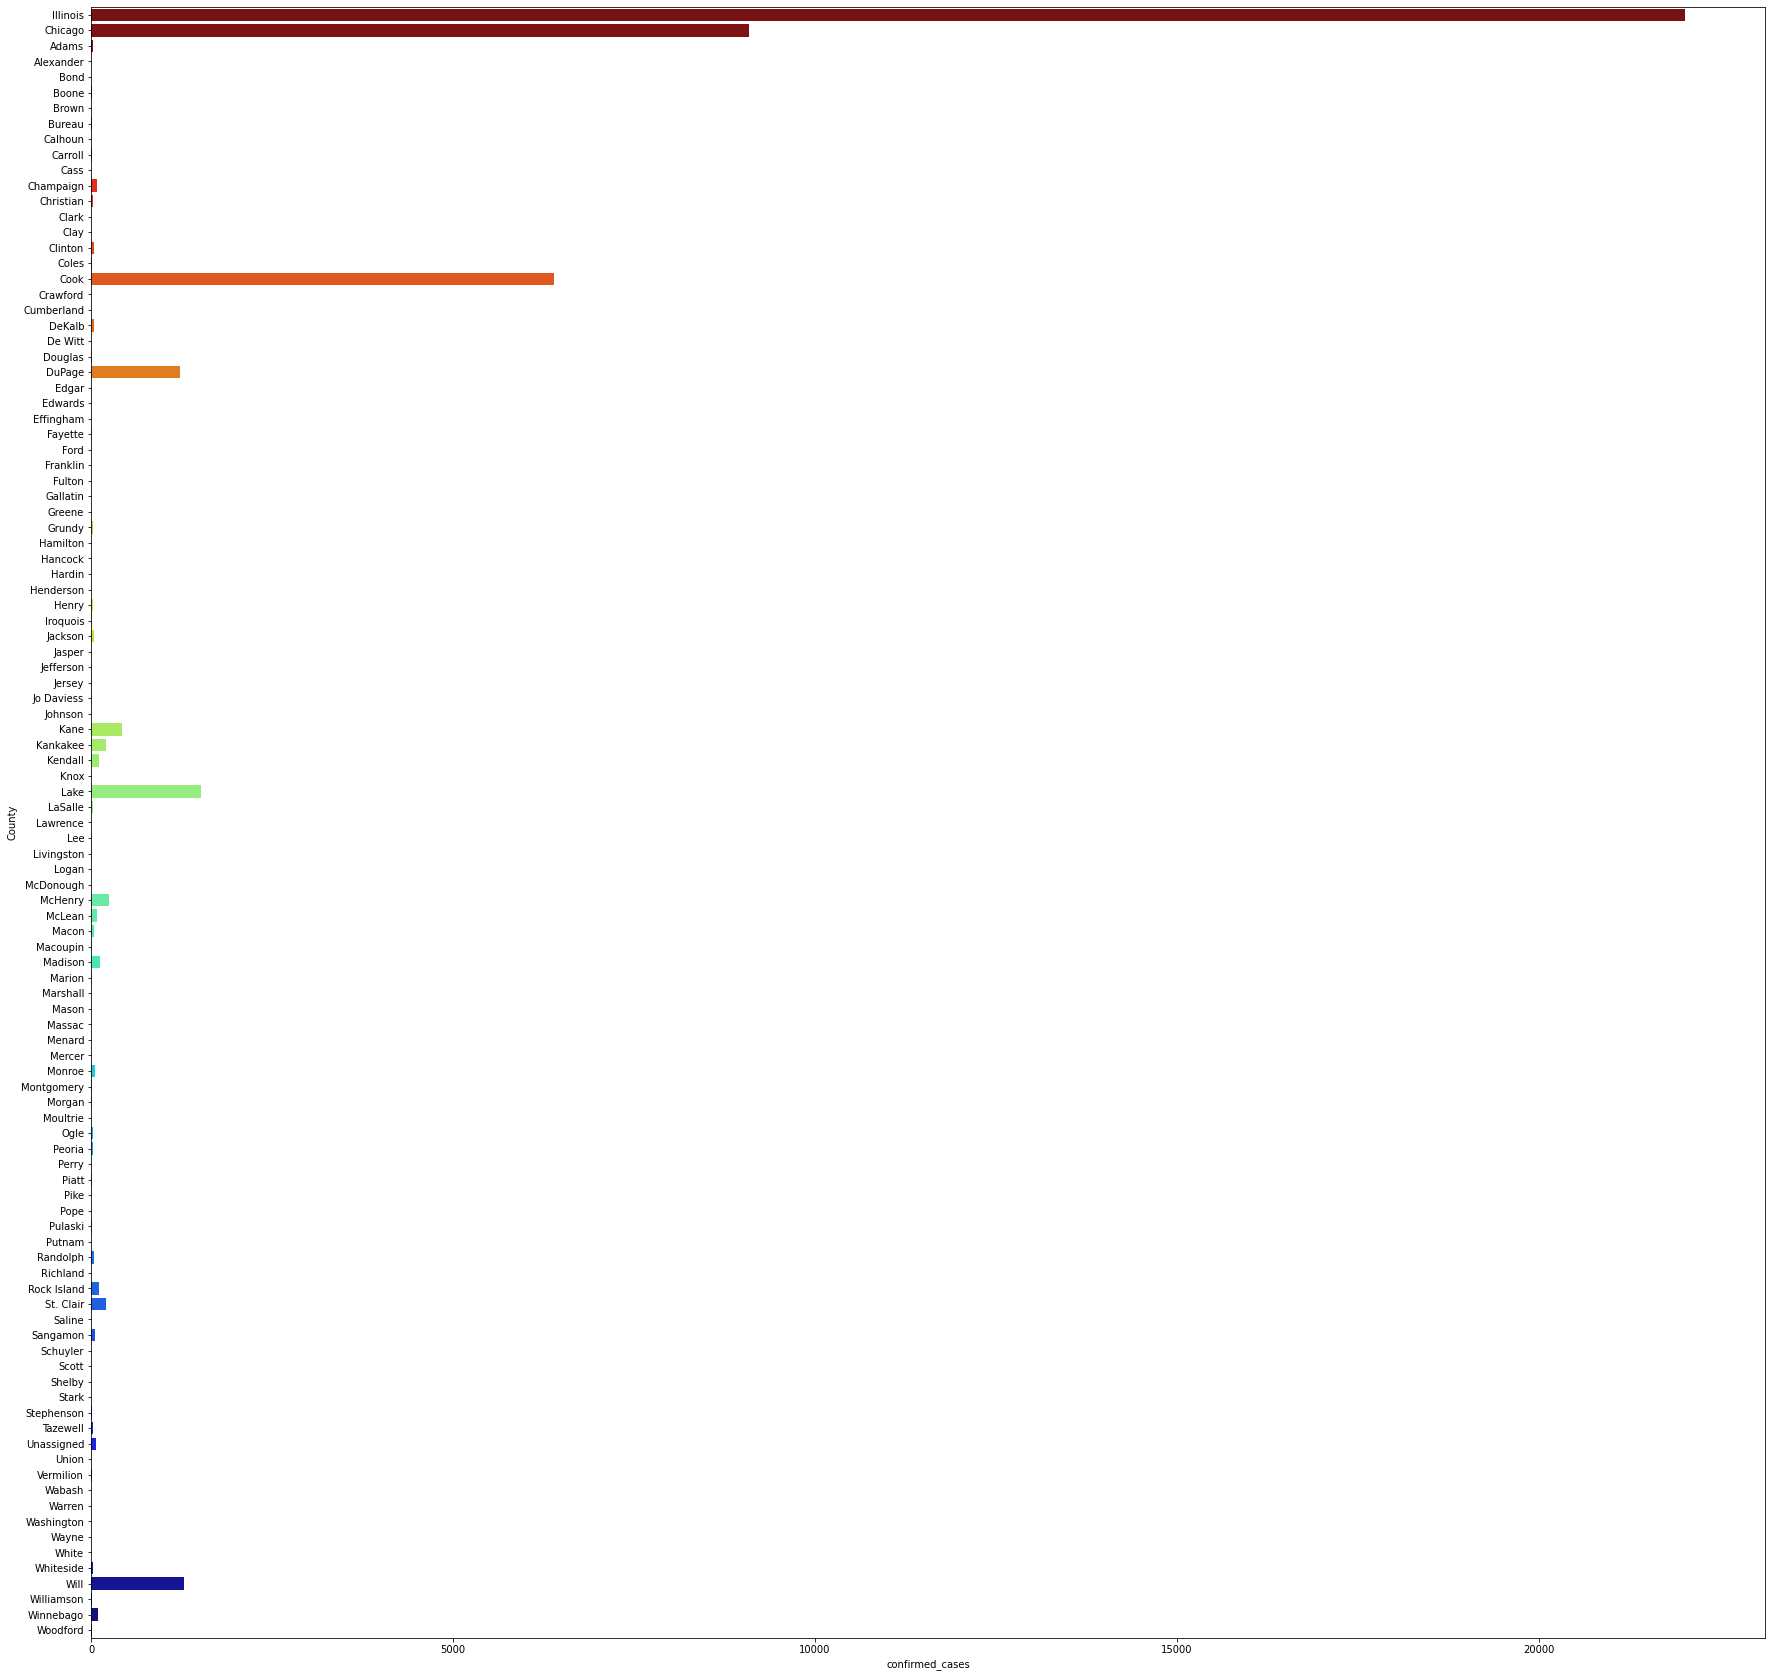

In [0]:
plt.figure(figsize = (30, 30))
sns.barplot(y = today_by_county.index, x = "confirmed_cases", data = today_by_county, palette="jet_r")


### Historical Data

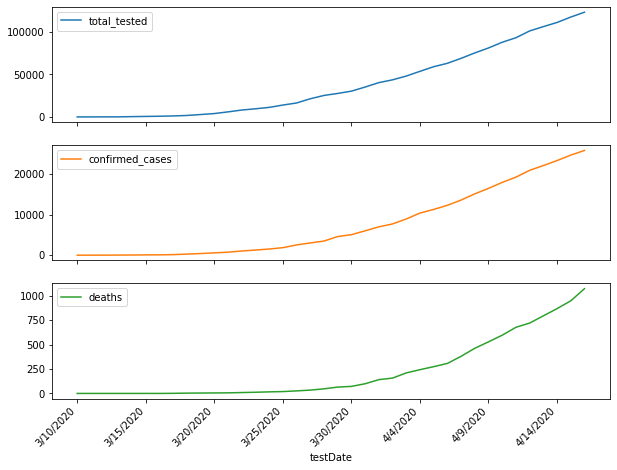

In [0]:
#plot the historical data of the number of tested, confirmed, and death cases
cases_history = pd.read_csv("https://projects.rcc.uchicago.edu/rcc/covid19-data/covid-19-illinois-data/historical_state_testing_results.csv")
cases_history.set_index('testDate', drop=True, inplace=True)
cases_history.plot.line(rot=45, subplots=True, figsize=(10, 8));

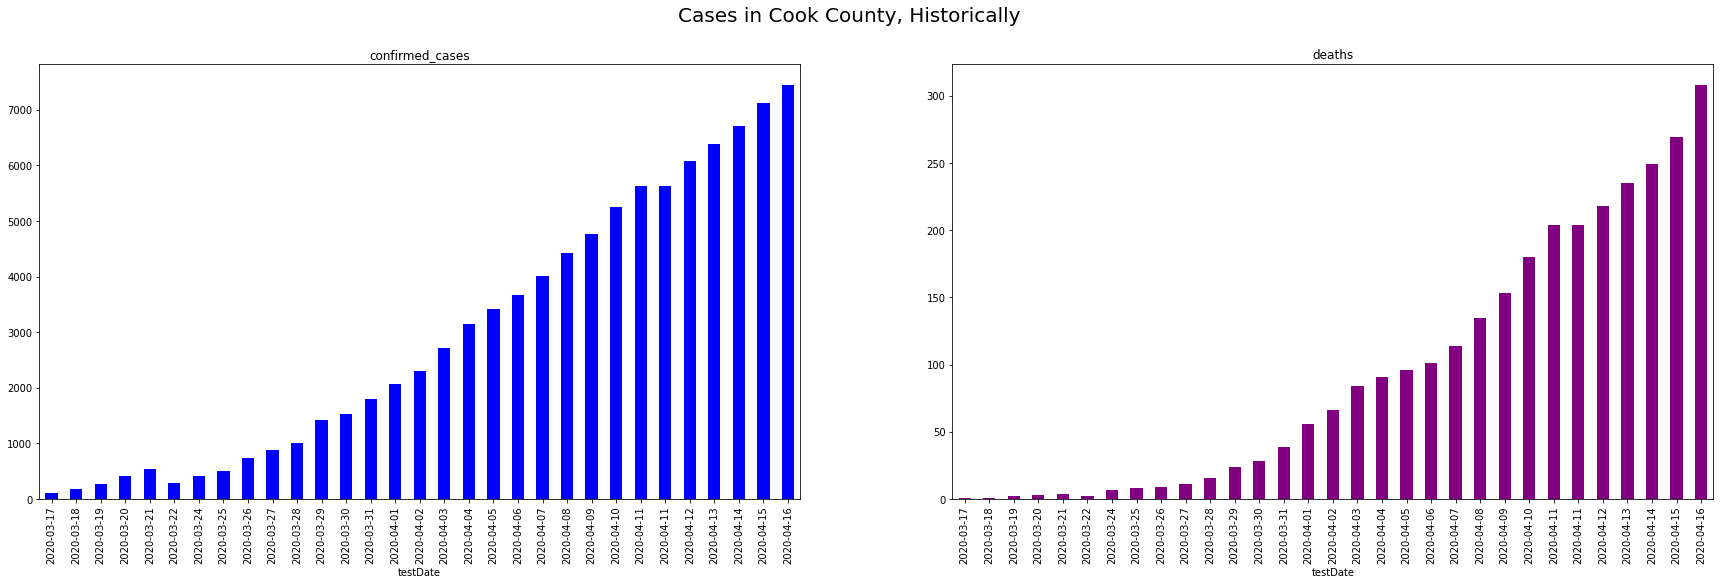

In [0]:
#plot the historical data of the number of confirmed cases in Cook County
cases_county_history = pd.read_csv("https://projects.rcc.uchicago.edu/rcc/covid19-data/covid-19-illinois-data/historical_state_testing_results_by_county.csv")
cases_county_history['testDate']= pd.to_datetime(cases_county_history['testDate']).dt.date
cases_county_history.set_index('testDate', drop=True, inplace=True)
cases_county_history.sort_index(ascending=True, inplace=True)

cook_county_history = cases_county_history.loc[cases_county_history['County']=='Cook']

# plot the number of confirmed, tested, and deaths in Cook County, historically 
fig, axes = plt.subplots(1,2, figsize=(30, 8))
fig.suptitle('Cases in Cook County, Historically', fontsize=20)

cook_county_history['confirmed_cases'].plot.bar(rot=90, subplots=True, figsize=(10, 8), ax=axes[0], color='blue');
cook_county_history['deaths'].plot.bar(rot=90, subplots=True, figsize=(10, 8), ax=axes[1], color='purple');


In [0]:
cases_per_county = pd.read_csv("https://projects.rcc.uchicago.edu/rcc/covid19-data/covid-19-illinois-data/historical_state_testing_results_by_county.csv	")

In [0]:
cases_per_county.head(10)

,testDate,County,total_tested,confirmed_cases,deaths,negative,lat,lon
0,4/16/2020,Illinois,122589,25733,1072,0,39.839888,-89.510168
1,4/16/2020,Chicago,0,10642,414,0,41.789896,-87.627734
2,4/16/2020,Adams,0,29,0,0,40.057800,-91.135300
3,4/16/2020,Alexander,0,1,0,0,37.167000,-89.360600
4,4/16/2020,Bond,0,4,1,0,38.903000,-89.474200
5,4/16/2020,Boone,0,18,1,0,42.348500,-88.826300
6,4/16/2020,Brown,0,0,0,0,0.000000,0.000000
7,4/16/2020,Bureau,0,7,0,0,0.000000,0.000000
8,4/16/2020,Calhoun,0,1,0,0,0.000000,0.000000
9,4/16/2020,Carroll,0,5,1,0,42.038600,-89.962700


### Using maps to represent the data

<Figure size 2160x576 with 0 Axes>

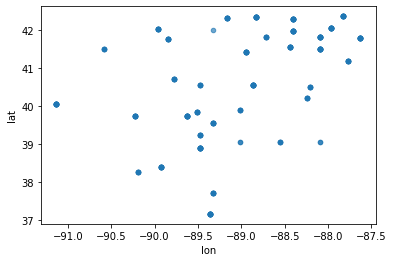

In [0]:
fig = plt.figure(figsize=(30, 8))
cases_per_county = cases_per_county[cases_per_county.lat != 0]
cases_per_county = cases_per_county[cases_per_county.lon != 0]
cases_per_county = cases_per_county[cases_per_county.lon < 0]
cases_per_county = cases_per_county[cases_per_county.County != "Illinois"]
cases_per_county.plot(kind="scatter", x="lon", y="lat", alpha=0.4)
fig.show()

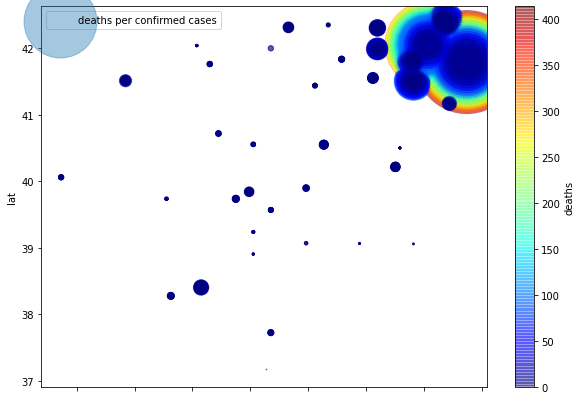

In [0]:
cases_per_county.plot(kind="scatter", x="lon", y="lat",
    s=cases_per_county['confirmed_cases'], label="deaths per confirmed cases",
    c="deaths", cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.4, figsize=(10,7),
)
plt.legend()
plt.show()

In [0]:
import folium
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
illinois_map = folium.Map(location=[43.864073, -91.706819],zoom_start=5)

In [0]:
locations = cases_per_county.groupby('County').first()

In [0]:
locations.head(10)

,testDate,total_tested,confirmed_cases,deaths,negative,lat,lon
County,,,,,,,
Adams,4/16/2020,0,29,0,0,40.057800,-91.135300
Alexander,4/16/2020,0,1,0,0,37.167000,-89.360600
Bond,4/16/2020,0,4,1,0,38.903000,-89.474200
Boone,4/16/2020,0,18,1,0,42.348500,-88.826300
Carroll,4/16/2020,0,5,1,0,42.038600,-89.962700
Champaign,4/16/2020,0,90,4,0,40.213900,-88.246100
Chicago,4/16/2020,0,10642,414,0,41.789896,-87.627734
Christian,4/16/2020,0,23,4,0,39.567200,-89.322700
Cook,4/16/2020,0,7445,308,0,42.050784,-87.963759


In [0]:
confirmed_locations = locations.loc[:, ['lat', 'lon', 'total_tested', 'confirmed_cases', 'deaths']]

In [0]:
print(confirmed_locations)

                   lat        lon  total_tested  confirmed_cases  deaths
County                                                                  
Adams        40.057800 -91.135300             0               29       0
Alexander    37.167000 -89.360600             0                1       0
Bond         38.903000 -89.474200             0                4       1
Boone        42.348500 -88.826300             0               18       1
Carroll      42.038600 -89.962700             0                5       1
Champaign    40.213900 -88.246100             0               90       4
Chicago      41.789896 -87.627734             0            10642     414
Christian    39.567200 -89.322700             0               23       4
Cook         42.050784 -87.963759             0             7445     308
DeKalb       41.833000 -88.710900             0               39       1
DuPage       41.824400 -88.090100             0             1463      69
Effingham    39.062200 -88.556500             0    

In [0]:
for i in range(len(confirmed_locations)):
    lat = confirmed_locations.iloc[i][0]
    long = confirmed_locations.iloc[i][1]
    popup_text = """County : {}<br>
                Total Tested : {}<br>
                Total Confirmed : {}<br>
                Deaths : {} <br>"""
    popup_text = popup_text.format(confirmed_locations.index[i],
                               confirmed_locations.iloc[i][-3],
                               confirmed_locations.iloc[i][-2],
                               confirmed_locations.iloc[i][-1]
                               )
    folium.CircleMarker(location = [lat, long], popup= popup_text, fill = True).add_to(illinois_map)

In [0]:
illinois_map

In [0]:
confirmed_locations['mortality_rate'] = confirmed_locations['deaths'] / confirmed_locations['confirmed_cases']
confirmed_locations = confirmed_locations.dropna()

In [0]:
confirmed_locations.head(5)

,lat,lon,total_tested,confirmed_cases,deaths,mortality_rate
County,,,,,,
Adams,40.0578,-91.1353,0,29,0,0.000000
Alexander,37.1670,-89.3606,0,1,0,0.000000
Bond,38.9030,-89.4742,0,4,1,0.250000
Boone,42.3485,-88.8263,0,18,1,0.055556
Carroll,42.0386,-89.9627,0,5,1,0.200000


In [0]:
illinois_map_mortality_rate = folium.Map(location=[43.864073, -91.706819],
                        zoom_start=5,
                        tiles="CartoDB dark_matter")

for i in range(len(confirmed_locations)):
    lat = confirmed_locations.iloc[i][0]
    long = confirmed_locations.iloc[i][1]
    radius = confirmed_locations.iloc[i][5] *100
    
    if confirmed_locations.iloc[i][5] > 0.1:
        color = "#FF4500"
    else:
        color = "#008080"
    
    popup_text = """County : {}<br>
                    Mortality Rate : {}<br>"""
    popup_text = popup_text.format(confirmed_locations.index[i],
                               confirmed_locations.iloc[i][5]
                               )
    folium.CircleMarker(location = [lat, long], popup= popup_text,radius = radius, color = color, fill = True).add_to(illinois_map_mortality_rate)

In [0]:
illinois_map_mortality_rate

### Other data available iin the Illinois data reporsitory: confirmed cases by county per age / gender/ race

In [0]:
cases_per_county_age = pd.read_csv("https://projects.rcc.uchicago.edu/rcc/covid19-data/covid-19-illinois-data/confirmed_cases_by_county_per_age.csv")

In [0]:
cases_per_county_age.head(20)

,County,Unknown,<20,20-29,30-39,40-49,50-59,60-69,70-79,80+
0,Adams,0,0,6,0,0,8,0,0,0
1,Alexander,0,0,0,0,0,0,0,0,0
2,Bond,0,0,0,0,0,0,0,0,0
3,Boone,0,0,0,0,0,0,0,0,0
4,Brown,0,0,0,0,0,0,0,0,0
5,Bureau,0,0,0,0,0,0,0,0,0
6,Calhoun,0,0,0,0,0,0,0,0,0
7,Carroll,0,0,0,0,0,0,0,0,0
8,Cass,0,0,0,0,0,0,0,0,0
9,Champaign,0,0,10,16,16,18,13,0,8


In [0]:
cases_per_county_gender = pd.read_csv("https://projects.rcc.uchicago.edu/rcc/covid19-data/covid-19-illinois-data/confirmed_cases_by_county_per_gender.csv")

In [0]:
cases_per_county_gender.head(20)

,County,Male,Female,Unknown/Left Blank
0,Adams,15,14,0
1,Alexander,0,0,0
2,Bond,0,0,0
3,Boone,6,12,0
4,Brown,0,0,0
5,Bureau,0,0,0
6,Calhoun,0,0,0
7,Carroll,0,0,0
8,Cass,0,0,0
9,Champaign,34,54,0


In [0]:
cases_per_county_race = pd.read_csv("https://projects.rcc.uchicago.edu/rcc/covid19-data/covid-19-illinois-data/confirmed_cases_by_county_per_race.csv")

In [0]:
cases_per_county_race.head(20)

,County,White,Black,Left Blank,Other,Asian,Hispanic,NH/PI*,AI/AN**
0,Adams,20,0,6,0,0,0,0,0
1,Alexander,0,0,0,0,0,0,0,0
2,Bond,0,0,0,0,0,0,0,0
3,Boone,0,0,16,0,0,0,0,0
4,Brown,0,0,0,0,0,0,0,0
5,Bureau,0,0,0,0,0,0,0,0
6,Calhoun,0,0,0,0,0,0,0,0
7,Carroll,0,0,0,0,0,0,0,0
8,Cass,0,0,0,0,0,0,0,0
9,Champaign,50,17,8,0,7,0,0,0


Exercise: Build a map using this data